# Week 09 Handson
In this week handson, we'll try to play with Kaggle, which is one of the biggest data science community platforms. We will try to join a Kaggle competition by building a model that can predict MoA (Mechanisms of Action) in drugs development. General guide about what you need to do:
1. Register to Kaggle (if you haven't had an account yet) with your full name,
2. Download the dataset,
3. Build a model,
4. Perform an inference to the given testing data,
5. Submit the inference result

Competition link: [cick here](https://www.kaggle.com/c/lish-moa/overview)

Submission:
1. This jupyter notebook: there are at least three blocks of codes, which are data preparation, modelling and inference. However, you are free to modify, e.g., further breaking down the data prepration block to EDA and data preprocessing, etc.
2. Csv file that is submitted to the competition.
3. Screenshot of your posisition in the leaderboard (jpg file).

Zip those three files above, with a file name of "W09_your-student-id_your-name.zip" and submit to the course portal. In case the allowable size is exceeded, you can upload to, e.g., gdrive first, then upload a txt file containing that download url to the course portal. In such case, please make sure that the url is publicly open.

# Data Preparation

## Exploratory Data Analysis

In [3]:
import pandas as pd

# Observe training features
train_features = pd.read_csv("dataset/train_features.csv")
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


The dataset contains gene features (named 'g-*') and cell features (named 'c-*')

In [4]:
# Get number of data
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 158.9+ MB


In [5]:
# Observe non binary training targets
train_targets_nonbinary = pd.read_csv("dataset/train_targets_nonscored.csv")
train_targets_nonbinary.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Observe binary training targets
train_targets = pd.read_csv("dataset/train_targets_scored.csv")
train_targets.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It can be seen that the training data has 876 columns. The targets data has 207 columns.
#### Therefore, multilabel classifier is needed. PCA is also needed if the training time takes too long.

In [7]:
# Detect existence of missing values
print(train_features.isnull().values.any())
print(train_targets_nonbinary.isnull().values.any())
print(train_targets.isnull().values.any())

False
False
False


Missing values do not exist in these dataframes.

In [8]:
# Analyze gene features and cell features:
train_features_list = train_features.columns.to_list()
g_list = [i for i in train_features_list if i.startswith('g-')]
c_list = [i for i in train_features_list if i.startswith('c-')]

print('Number of gene features: ', len(g_list))
print('Number of cell features: ', len(c_list))

Number of gene features:  772
Number of cell features:  100


In [9]:
%%script false --no-raise-error

# Check the correlations between g_list and c_list:
correlation_columns = ['cp_time']
correlation_columns.extend(g_list)
correlation_columns.extend(c_list)

highly_correlated_columns = []
for i in range(0, len(correlation_columns)):
    for j in range(i + 1, len(correlation_columns)):
        corr_i = train_features[correlation_columns[i]]
        corr_j = train_features[correlation_columns[j]]
        
        if abs(corr_i.corr(corr_j)) > 0.9:
            highly_correlated_columns.extend([correlation_columns[i], correlation_columns[j]])

Couldn't find program: 'false'


In [10]:
%%script false --no-raise-error

highly_correlated_columns = list(set(highly_correlated_columns))
print('Number of highly correlated columns: ', len(highly_correlated_columns))

Couldn't find program: 'false'


In [11]:
%%script false --no-raise-error

# Visualize the correlation matrix
corr_matrix_df = train_features[highly_correlated_columns]
corr_matrix_df.corr().style.background_gradient(cmap='coolwarm')

Couldn't find program: 'false'


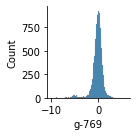

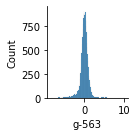

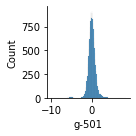

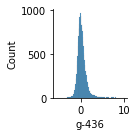

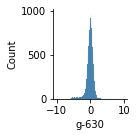

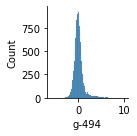

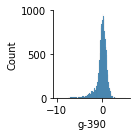

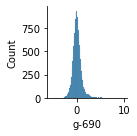

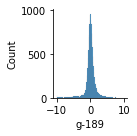

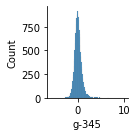

In [20]:
import seaborn as sns
import numpy as np
import random

# Take ten random features from g_list
random_g_list = []
for i in range (0, 10):
    random_g_list.append(g_list[random.randint(0,len(g_list))])
    
for feature in random_g_list:
    sns.displot(data=gene_df[feature], height=2)

Based on the plots above, no significant skewness exists. Further analysis about the distributions is shown below this cell:

Since there exists 207 columns in train_targets_scored.csv and train_targets_nonscored.csv, it's possible to have an imbalanced distribution.

In [13]:
# Check the distribution of targets

# Encode as boolean since there's only 0 and 1
train_targets_distribution = train_targets.drop(['sig_id'], axis=1).astype(bool).sum(axis=1).reset_index()
train_targets_distribution.columns = ['number of rows', 'number of activations']

train_targets_distribution = train_targets_distribution.groupby(['number of activations'])['number of rows'].count().reset_index()
print(train_targets_distribution)

   number of activations  number of rows
0                      0            9367
1                      1           12532
2                      2            1538
3                      3             303
4                      4              55
5                      5              13
6                      7               6


In [14]:
total_rows = sum(train_targets_distribution['number of rows'])
for i in range (0, len(train_targets_distribution)):
    percentage = (train_targets_distribution['number of rows'][i]/total_rows) * 100
    print('Percentage of', train_targets_distribution['number of activations'][i], ': ', percentage, '%')

Percentage of 0 :  39.33400520702108 %
Percentage of 1 :  52.624506592760554 %
Percentage of 2 :  6.458385823465189 %
Percentage of 3 :  1.2723607961703198 %
Percentage of 4 :  0.23095658016292936 %
Percentage of 5 :  0.05458973712941967 %
Percentage of 7 :  0.02519526329050139 %


More than 90% of data in train targets only have 0 or 1 activation. Therefore, the data is imbalanced.

# Modelling

# Inference